In [1]:
import arviz as az
from tms_risk.utils import get_all_behavior
from tms_risk.cogmodels.evidence_model import EvidenceModel, EvidenceModelTwoPriors, EvidenceModelGauss, EvidenceModelTwoPriorsDiminishingUtility, EvidenceModelDiminishingUtility
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
traces = {}

for model in ['1', '2', '5']:
    traces[f'model {model}'] = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/model-{model}_trace.netcdf')

In [3]:
comparison = az.compare(traces)

In [4]:
labels = {'model 1':'2 evidence sds',
'model 2':'2 evidence sds + different priors',
'model 3':'2 evidence sds (Gauss)',
'model 4':'2 evidence sds + diminishing utility',
'model 5':'2 evidence sds + different priors + diminishing utility',
'model 6':'4 evidence sds',
'model 7':'4 evidence sds + different priors',
'model 8':'Khaw et al.'}

In [5]:
comparison.index = comparison.index.map(labels)

In [6]:
comparison


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
2 evidence sds + different priors + diminishing utility,0,-6157.989743,114.350376,0.000000,0.971553,51.882052,0.000000,False,log
2 evidence sds + different priors,1,-6276.528476,109.160297,118.538733,0.000000,50.341302,15.231472,False,log
2 evidence sds,2,-6704.672681,91.828886,546.682938,0.028447,44.785000,32.219811,False,log


<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

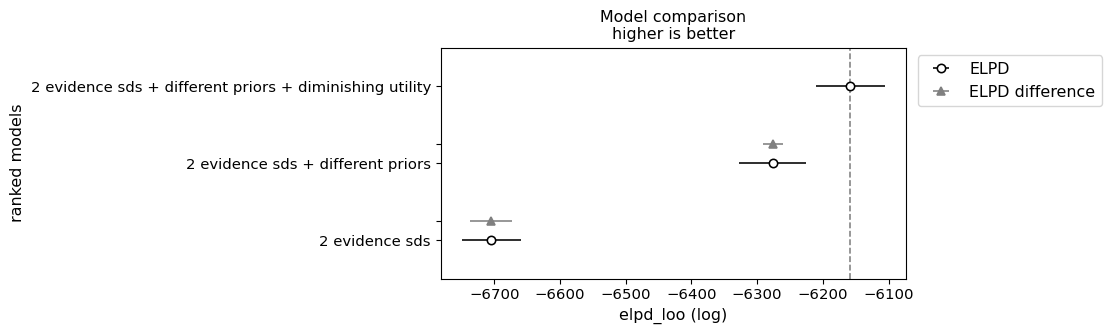

In [7]:
az.plot_compare(comparison)